MDA620 Data Driven Decision Making Capstone Project by --- Prachi Vithlani



# Project Name: Music Popularity Prediction and Recommendation Using Machine Learning Techniques

Project Name: Music Popularity Prediction and Recommendation Using Machine Learning Techniques

Data Source: https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset

I have used a small excerpt of the above datasource.


In [1]:
import pandas as pd

#Loading the Dataset:

df = pd.read_csv("Spotify_data.csv")

print(df.head())


   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96     5/4/2024   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94    5/31/2024   
2  4AzPr5SUpNF553eC1d3aRy  7iabz12vAuVQYyekFIWJxD 

In [2]:
#Dropping the Unnamed Column , no Longer Required:

df.drop(columns = ['Unnamed: 0'], inplace = True)


In [3]:
# Displaying the Columns Info:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

In [4]:
#Checking for Null Values: 

print(df.isnull().sum())

Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64


In [5]:
print(df['Popularity'].describe())


count    227.00000
mean      71.85022
std       10.24110
min       13.00000
25%       68.00000
50%       72.00000
75%       78.00000
max       96.00000
Name: Popularity, dtype: float64


Moving Towards Exloratory Data Analysis

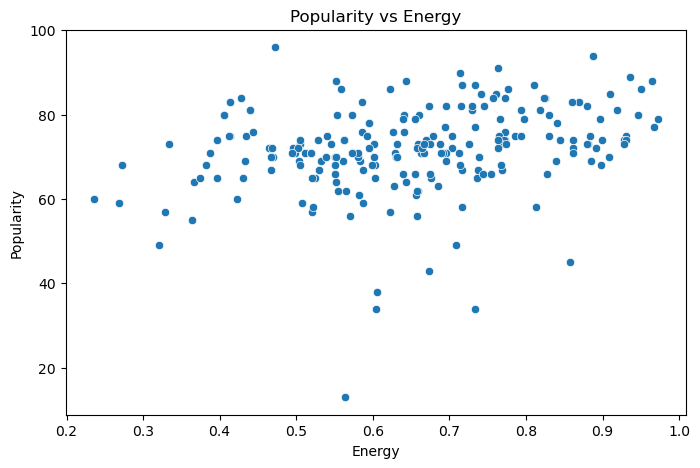

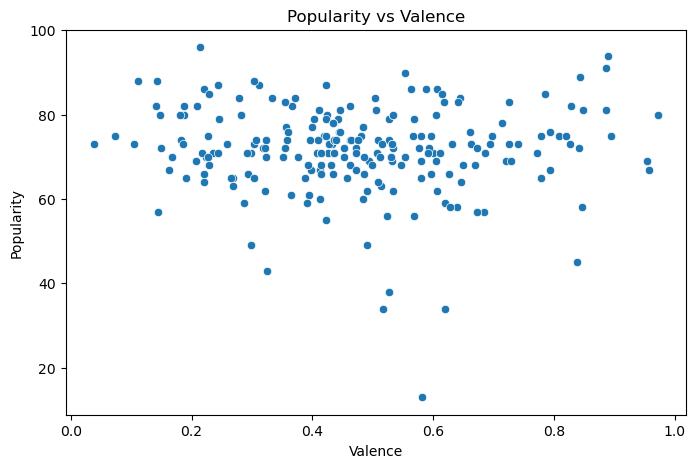

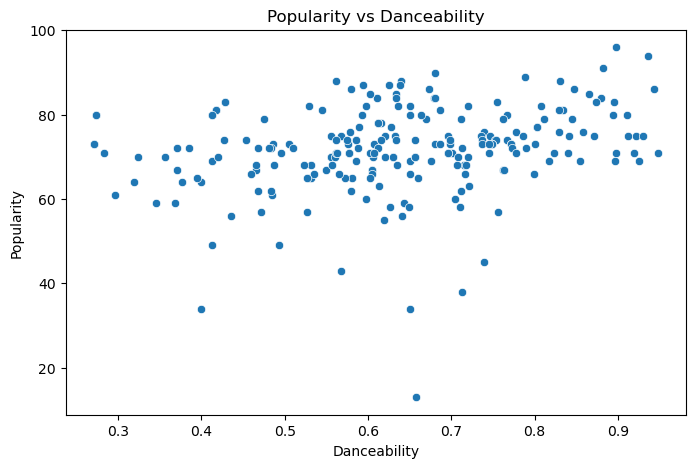

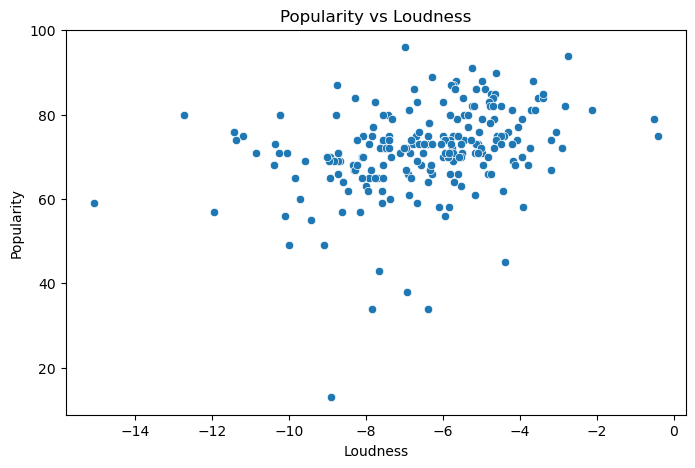

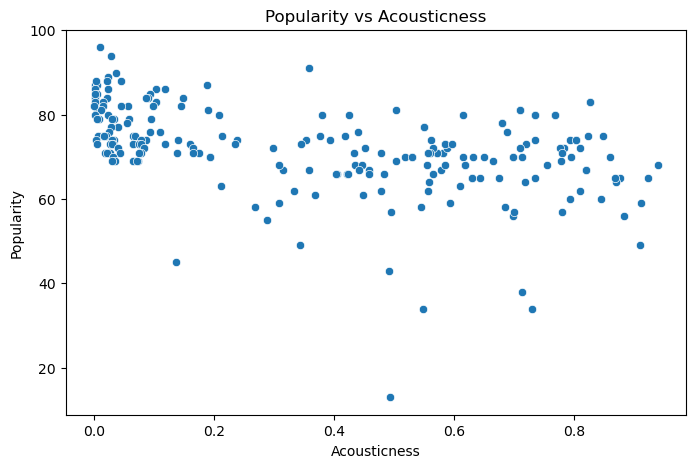

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y='Popularity')
    plt.title(f'Popularity vs {feature}')
    plt.show()
    

From the above visualizations, we can observe that higher Energy levels and Danceability tend to correlate Positively with higher Popularity scores.

Conversely, increased Acousticness and lower Loudness levels generally correspond with lower Popularity, suggesting that more energetic and less acoustic tracks are favoured.

Valence (i.e., Musical Positiveness) shows a weaker, less clear relationship with Popularity, indicating that the emotional positivity of a track alone doesn’t strongly predict its popularity.


Now, we will see the Correlation Matrix between few of the important Features...


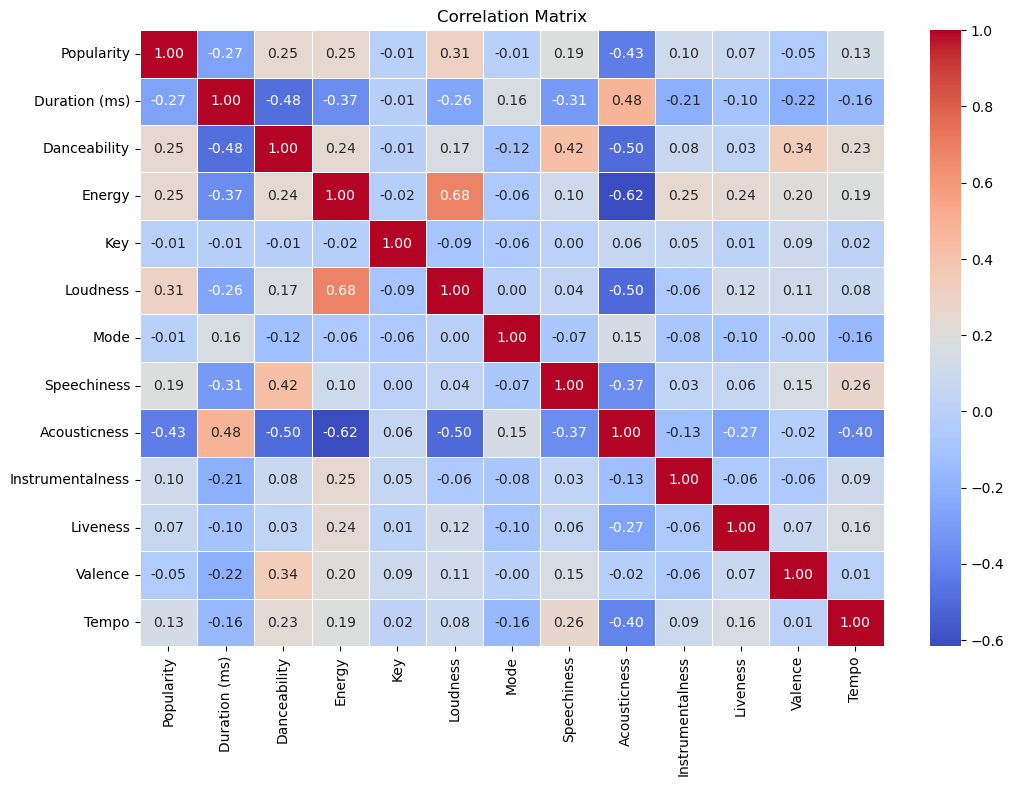

In [7]:

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()




From the above correlation matrix, we can see that popularity has a moderate positive correlation with loudness (0.31) and danceability (0.25), indicating that louder and more danceable tracks tend to be more popular. 

There is a moderate negative correlation between popularity and acousticness (-0.43), suggesting that tracks with higher acousticness are generally less popular. 

Energy also has a positive correlation with popularity (0.25).


Now, let’s have a look at the distribution of all the music features:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


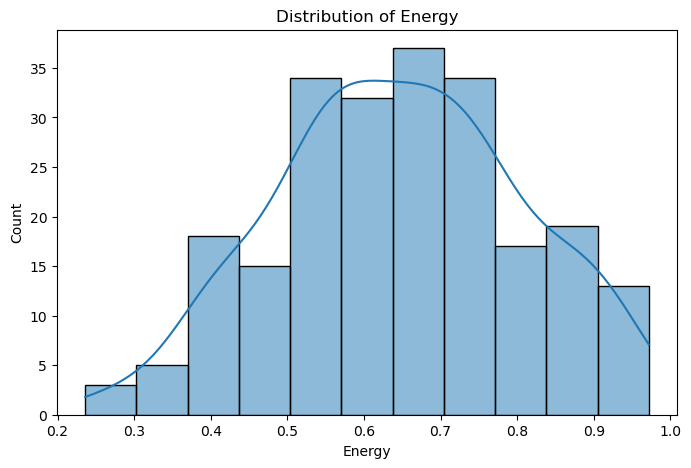

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


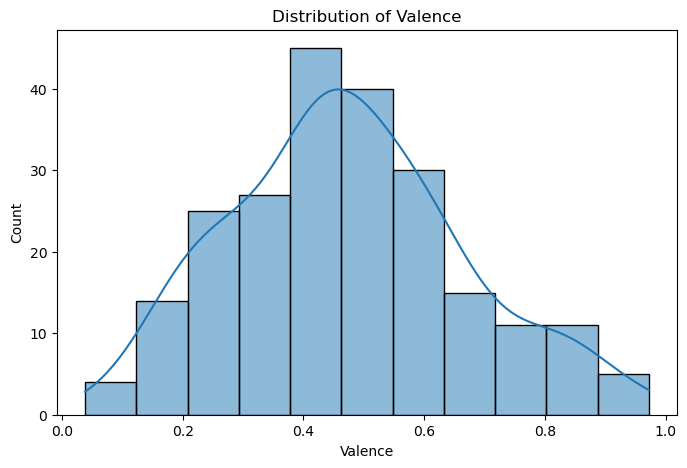

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


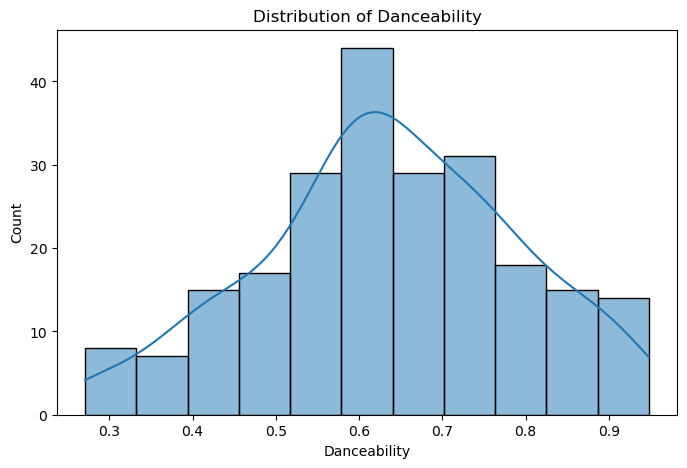

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


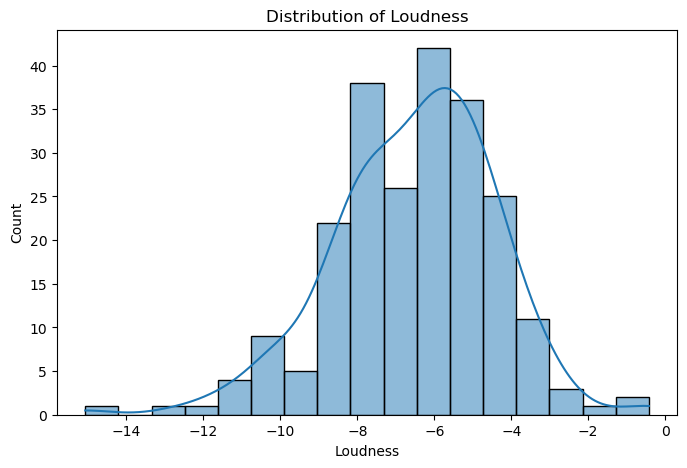

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


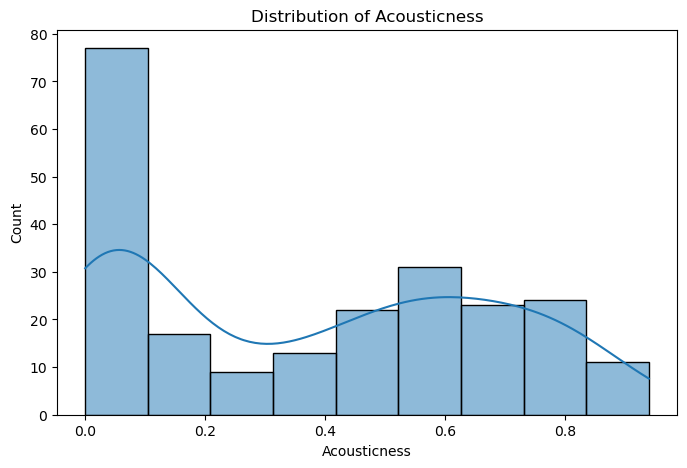

In [8]:

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    


The distribution of energy is roughly bell-shaped, which indicates a balanced range of energy levels in the tracks. 

Valence and Danceability also follow a similar distribution, with most tracks having mid-range values, which suggests an even mix of emotionally positive and danceable tracks. 

Loudness has a near-normal distribution centred around -6 dB, which reflects typical volume levels in the dataset. 

Acousticness, however, is skewed towards lower values, indicating that most tracks are not highly acoustic.


# Time Series Analysis

Number of Releases Over Time (Count how many songs were released per month)

In [9]:

df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.to_period('M')

# Aggregation: Number of releases per month
releases_per_month = df.groupby('Month').size().reset_index(name='Releases')

print(releases_per_month)


      Month  Releases
0   2001-10         1
1   2007-01         1
2   2007-10         1
3   2010-09         1
4   2011-10         1
..      ...       ...
80  2024-01         7
81  2024-02        10
82  2024-03         8
83  2024-04         8
84  2024-05        17

[85 rows x 2 columns]


Average Popularity Over Time
Track how the popularity of tracks evolves over time.

In [10]:
avg_popularity = df.groupby('Month')['Popularity'].mean().reset_index(name ='Average Popularity')

print(avg_popularity)


      Month  Average Popularity
0   2001-10           59.000000
1   2007-01           67.000000
2   2007-10           69.000000
3   2010-09           60.000000
4   2011-10           70.000000
..      ...                 ...
80  2024-01           77.857143
81  2024-02           77.000000
82  2024-03           78.125000
83  2024-04           79.250000
84  2024-05           72.529412

[85 rows x 2 columns]


Feature Trends (Energy, Danceability, etc.)
Calculate average feature values per month or year.

In [11]:
feature_trends = df.groupby('Month')[['Energy', 'Danceability', 'Acousticness']].mean().reset_index()

print(feature_trends)


      Month    Energy  Danceability  Acousticness
0   2001-10  0.268000      0.643000      0.593000
1   2007-01  0.737000      0.549000      0.459000
2   2007-10  0.532000      0.586000      0.779000
3   2010-09  0.236000      0.598000      0.845000
4   2011-10  0.470000      0.356000      0.518000
..      ...       ...           ...           ...
80  2024-01  0.677857      0.655000      0.264411
81  2024-02  0.679200      0.662700      0.430870
82  2024-03  0.687625      0.730250      0.205113
83  2024-04  0.655750      0.769875      0.123387
84  2024-05  0.572176      0.677529      0.490251

[85 rows x 4 columns]


Rolling Averages.
Use rolling averages to smooth noisy trends.

Purpose of Rolling Average:
1. Smooths Out Short-Term Variations:

2. Helps reduce noise or fluctuations in the data.
3. Useful for identifying trends over time.

Moving Trends:
    
1. A rolling average allows you to observe trends as it progresses over time.

In [12]:

releases_per_month['Rolling Average'] = releases_per_month['Releases'].rolling(window=3).mean()



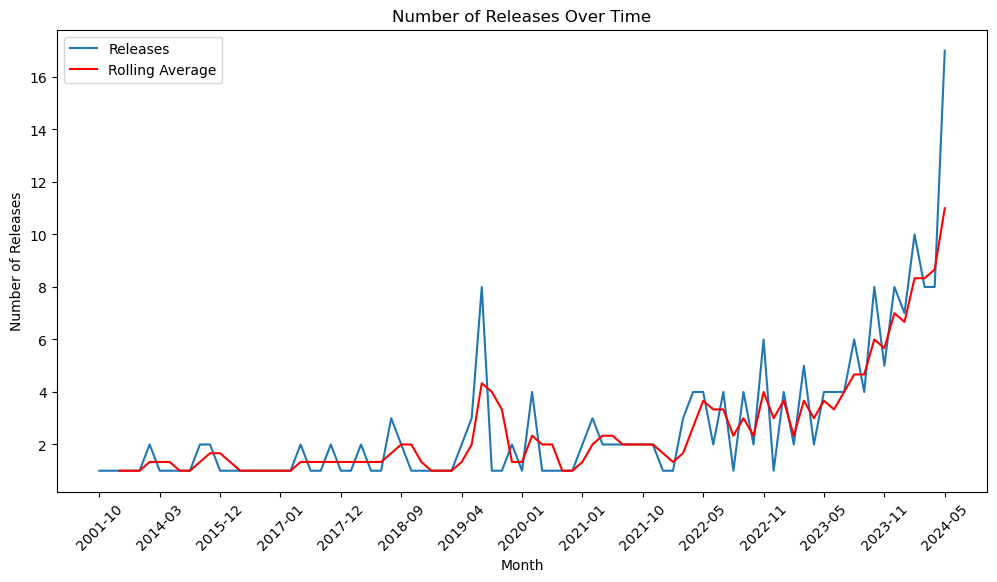

In [13]:
import matplotlib.pyplot as plt

# Plot the number of releases over time
plt.figure(figsize=(12, 6))
plt.plot(releases_per_month['Month'].astype(str), releases_per_month['Releases'], label='Releases')
plt.plot(releases_per_month['Month'].astype(str), releases_per_month['Rolling Average'], label='Rolling Average', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Number of Releases Over Time')
plt.legend()

# Adjust x-ticks to display every 6th month (or choose another interval)
plt.xticks(range(0, len(releases_per_month['Month']), 6), 
           releases_per_month['Month'].astype(str)[::6], rotation=45)

plt.show()


The above graph shows the trend of the number of releases over time, with a 3-month rolling average for smoothing out short-term fluctuations.

Key Observations:

1.Number of Releases:

The blue line represents the number of releases for each month. Initially, the number of releases is quite low and relatively constant (close to 1-2 per month). There is a sudden spike in releases at certain points, which may indicate specific events like album drops, promotions, or seasonal activity.

2.Rolling Average:

The red line is the 3-month rolling average of releases. The rolling average smooths out short-term volatility and provides a clearer picture of the overall trend. Over time, the rolling average shows a gradual upward trend, suggesting that music releases have increased in frequency.

3.Long-Term Trend:

Toward the right side of the graph (more recent months), the number of releases sharply increases, indicating a possible upward trend in recent music releases.

4.Fluctuations:

Noticeable peaks and dips occur periodically, which could reflect seasonality (e.g., holiday seasons or summer) or other external factors influencing music releases.


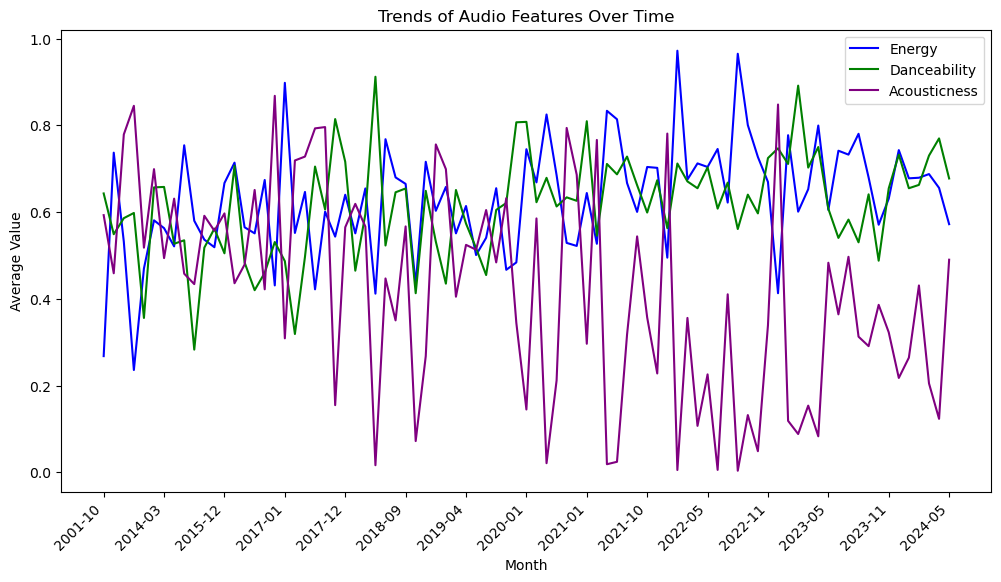

In [14]:
import matplotlib.pyplot as plt

# Group by Month and compute average feature values
feature_trends = df.groupby('Month')[['Energy', 'Danceability', 'Acousticness']].mean().reset_index()

# Plot Feature Trends
plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(feature_trends['Month'].astype(str), feature_trends['Energy'], label='Energy', color='blue')
plt.plot(feature_trends['Month'].astype(str), feature_trends['Danceability'], label='Danceability', color='green')
plt.plot(feature_trends['Month'].astype(str), feature_trends['Acousticness'], label='Acousticness', color='purple')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Trends of Audio Features Over Time')
plt.legend()

# Rotate and adjust x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate 45 degrees, set alignment and reduce font size

# Optionally, reduce the number of x-ticks
plt.xticks(ticks=range(0, len(feature_trends['Month']), 6))  # Show every other month, adjust as needed

plt.show()


General Trends and Potential Interpretations:
    
1.Fluctuation: The fluctuations across all three features might reflect changes in the types of music that were popular in each month, such as different genres becoming dominant at certain times.

2.Correlation: You might notice that sometimes all three features rise or fall together, which could indicate a general trend in the type of music being produced (e.g., more energetic and danceable music with less acoustic content).

3.Seasonality: If the data spans a year, you might observe seasonal patterns (e.g., higher energy or danceability in the summer months due to more party music or festivals).
    
    
    
    

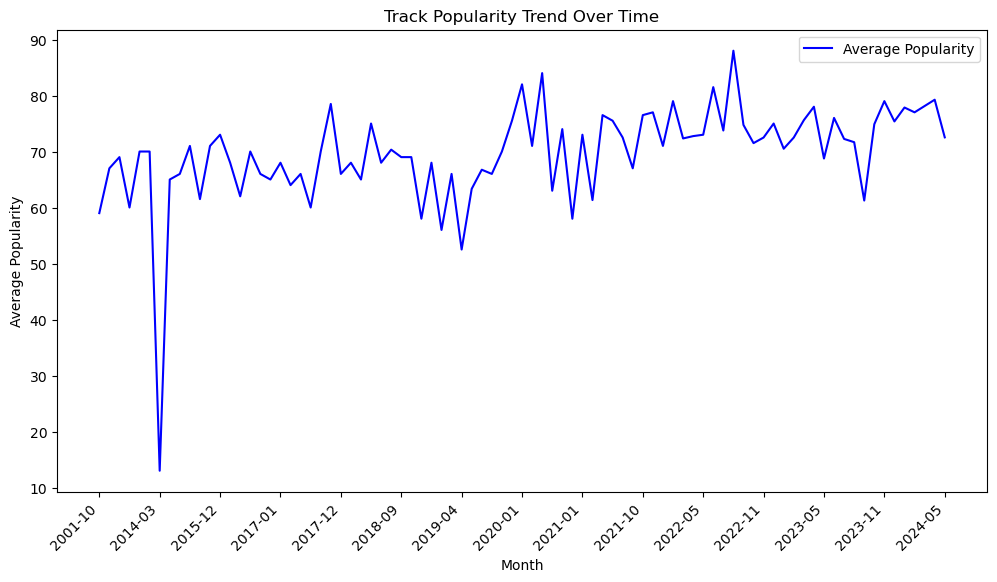

In [17]:
# Group by Month and calculate average popularity
popularity_trend = df.groupby('Month')['Popularity'].mean().reset_index()

# Plot Popularity Trend
plt.figure(figsize=(12, 6))
plt.plot(popularity_trend['Month'].astype(str), popularity_trend['Popularity'], label='Average Popularity', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.title('Track Popularity Trend Over Time')
plt.legend()

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.xticks(ticks=range(0, len(feature_trends['Month']), 6))

plt.show()



As per the Correlation Matrix, Feature Selection is done based on the following Features :
    
Use the top positively and negatively correlated features as predictors:

Loudness,
Danceability,
Energy,
Speechiness,
Acousticness (negative correlation, valuable for inverse relationships),
Tempo,
Duration (ms),
This combination of features ensures you capture key relationships with Popularity.



Since I am forecasting Popularity over time, include time-based features such as:

Year and Month from the release date.
Lagged popularity values (e.g., previous month's popularity).
Rolling averages (e.g., 3-month or 6-month rolling average popularity).
                          

Since this is a time-series problem, avoid random shuffling. Use a chronological split.

Split the data into training and testing sets:
Train: Older data (e.g., up to 2022).
Test: Recent data (e.g., 2023).
    


Model Selection: Using XGBoost and Checking the Accuuracy of How is MOdel Performing ?


In [20]:
#!pip install xgboost

In [21]:
#!pip install --upgrade scikit-learn


# Feature Selection and Model Training

Based on the correlation analysis and visualizations, the following features show a significant relationship with popularity and can be used to train a music popularity prediction model:
    
Energy,
Valence,
Danceability,
Loudness,
Acousticness,
Tempo,
Speechiness,
Liveness

These features capture various audio characteristics that influence the popularity of music tracks.

The next step is to train a Machine Learning model to predict the popularity of music using the features we have selected. 

So, let’s split and scale the data and then train the model using the Random Forest Regression Algorithm:


In [30]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# select the features and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
X = df[features]
y = df['Popularity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],  # Replace 'auto' with 'sqrt'
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit=True, verbose=2, cv=5, error_score='raise')

grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf_model = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test_scaled)


# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_best_rf)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_best_rf)

# Print the results
print(f"Test RMSE: {rmse}")
print(f"R-squared: {r2}")



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=log2, 

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=

[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=20, max_features=log2, m

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_feature

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=log2, 

[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, 

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, ma

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max

Now, let’s have a look at the actual vs predicted results of the test data for Random Forest :

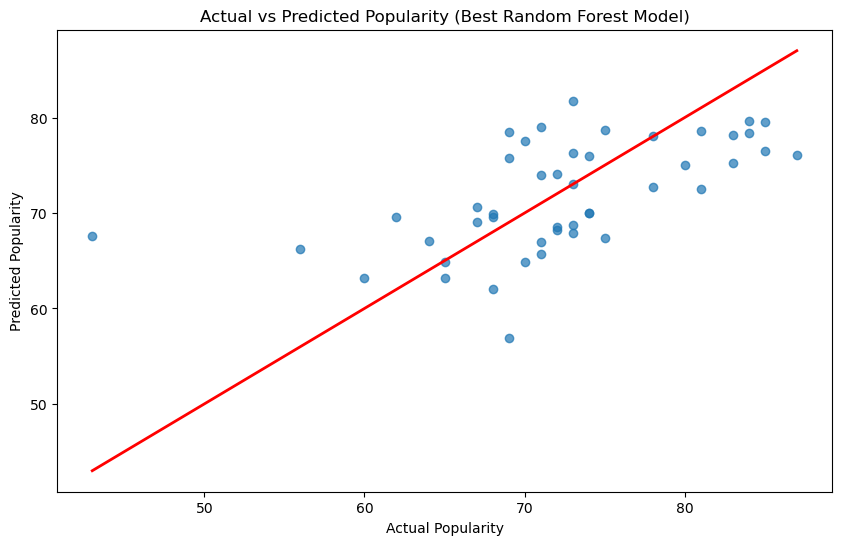

In [58]:
# make predictions
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()



The red line represents perfect predictions, where the predicted popularity would exactly match the actual popularity. 
Most of the points are clustered around this line, which indicates that the model is making reasonably accurate predictions. 
However, there are some deviations, particularly at lower popularity values, which suggest areas where the model’s predictions are less precise.


Using the Same Features Let's see How XGBoost Works on the Dataset and how much Accuracy it gives 



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# Select the features and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
X = df[features]
y = df['Popularity']

# Train-Test Split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Train XGBoost model directly without GridSearchCV
model = XGBRegressor(random_state=42)
model.fit(X1_train_scaled, y1_train)

# Make predictions on the test set
y1_pred = model.predict(X1_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y1_test, y1_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y1_test, y1_pred)

# Print the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"R-squared: {r2}")


Test RMSE: 10.002069640565724
R-squared: -0.5030361413955688


Now, Lets have a Look at the Actual vs the Predicted Values of the Test Dataset of XGBoost Model:

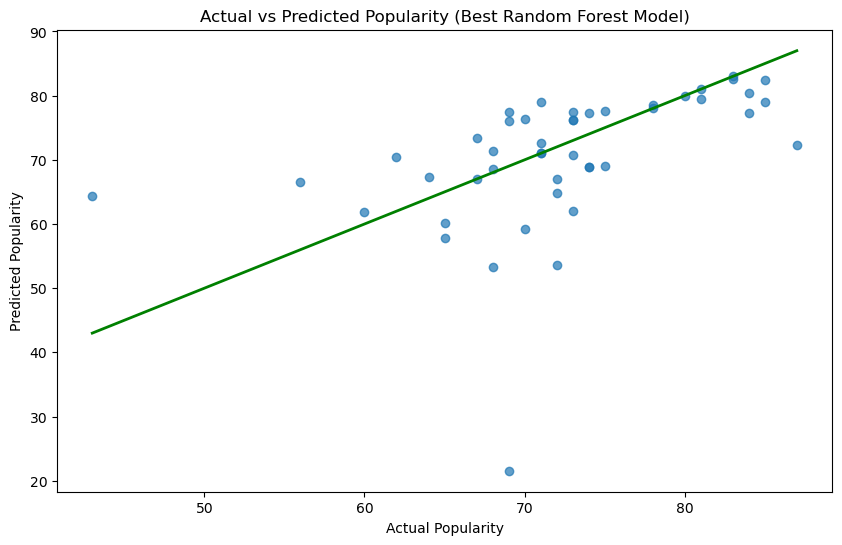

In [49]:
# make predictions
y1_pred = model.predict(X1_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, alpha=0.7)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='green', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()



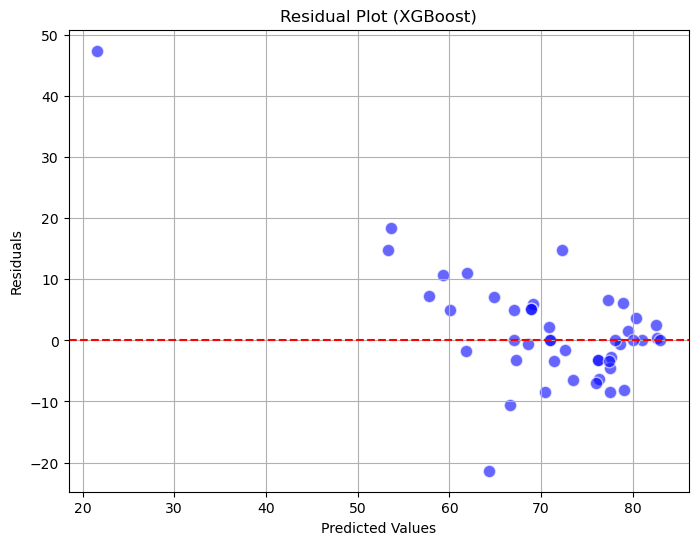

In [38]:
residuals = y1_test - y1_pred

plt.figure(figsize=(8, 6))
plt.scatter(y1_pred, residuals, color='blue', alpha=0.6, edgecolors='w', s=80)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.grid(True)
plt.show()


For the Above Graph of the Residual Plot of the Predicted Values of the XGBoost:

The residual plot for the XGBoost model shows the distribution of the differences between the actual and predicted values. A few key observations can be made:

1. Spread of Residuals: The residuals are scattered fairly evenly around the horizontal line at 0, indicating that the model does not have a systematic bias in under- or over-predicting the target variable.

2. Magnitude of Residuals: The residuals range from around -15 to +40, which is a relatively wide spread. This suggests the XGBoost model is not perfectly fitting the data and there is still room for improvement in the model's predictive accuracy.

3. Clustering of Residuals: There appear to be some clusters of residuals, particularly in the range of predicted values between 50-70. This could indicate that the model is not capturing certain patterns or relationships in the data as well as it could.

4. Heteroscedasticity: The spread of residuals appears to be roughly consistent across the range of predicted values, meaning the model does not seem to suffer from major heteroscedasticity (non-constant variance) issues.

Overall, the residual plot suggests the XGBoost model has room for improvement in terms of reducing the magnitude of prediction errors and potentially identifying and addressing any systematic patterns in the residuals. The relatively wide spread of residuals indicates the model is not a perfect fit for the data, but the lack of clear bias or heteroscedasticity is a positive sign.

Here, we consider the Random Forest Model Over the XGBoost Model which performs well over the data

# Recommendation of Popular Tracks using the Same Dataset:

Using the Same Data lets Recommend some songs based on the Music Features which helps user get to know new Songs 

Now, let’s move further to building a music recommendation system using Python. 

 Let’s import the necessary Python libraries now:

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity




In [53]:
# Loading the Dataset:

df = pd.read_csv("Spotify_data.csv")

print(df.head())


   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96     5/4/2024   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94    5/31/2024   
2  4AzPr5SUpNF553eC1d3aRy  7iabz12vAuVQYyekFIWJxD 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        227 non-null    int64  
 1   Track Name        227 non-null    object 
 2   Artists           227 non-null    object 
 3   Album Name        227 non-null    object 
 4   Album ID          227 non-null    object 
 5   Track ID          227 non-null    object 
 6   Popularity        227 non-null    int64  
 7   Release Date      227 non-null    object 
 8   Duration (ms)     227 non-null    int64  
 9   Explicit          227 non-null    bool   
 10  External URLs     227 non-null    object 
 11  Danceability      227 non-null    float64
 12  Energy            227 non-null    float64
 13  Key               227 non-null    int64  
 14  Loudness          227 non-null    float64
 15  Mode              227 non-null    int64  
 16  Speechiness       227 non-null    float64
 1

In [57]:
# Replacing the Column Names with '_'

df.columns = df.columns.str.replace(' ', '_')


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed:_0        227 non-null    int64  
 1   Track_Name        227 non-null    object 
 2   Artists           227 non-null    object 
 3   Album_Name        227 non-null    object 
 4   Album_ID          227 non-null    object 
 5   Track_ID          227 non-null    object 
 6   Popularity        227 non-null    int64  
 7   Release_Date      227 non-null    object 
 8   Duration_(ms)     227 non-null    int64  
 9   Explicit          227 non-null    bool   
 10  External_URLs     227 non-null    object 
 11  Danceability      227 non-null    float64
 12  Energy            227 non-null    float64
 13  Key               227 non-null    int64  
 14  Loudness          227 non-null    float64
 15  Mode              227 non-null    int64  
 16  Speechiness       227 non-null    float64
 1

While providing music recommendations to users, it is important to recommend the latest releases. For this, we need to give more weight to the latest releases in the recommendations. 
Let’s write a function to solve this problem:

In [81]:
import pandas as pd
from datetime import datetime

# Function to calculate weighted popularity scores based on release date
def calculate_weighted_popularity(Release_Date):
    # Convert the release date to datetime object
    try:
        Release_Date = pd.to_datetime(Release_Date, infer_datetime_format=True)
    except ValueError:
        # If the date conversion fails, return 0 for the weight
        return 0
    
    # Set the target date to May 31, 2024
    target_date = pd.Timestamp('2024-05-31')
    
    # Calculate the time span between release date and target date
    time_span = target_date - Release_Date
    
    # Calculate the weighted popularity score based on time span (e.g., more recent releases have higher weight)
    weight = 1 / (time_span.days + 1)
    return weight



The above function takes the release date of a music track as input, which is provided in the format ‘YYYY-MM-DD’. 
It then uses the datetime.strptime function from the Python datetime module to convert the release date string to a datetime object. 
This conversion allows us to perform arithmetic operations with dates. 
The function then calculates the time span between the release date of the track and the current date (today’s date) using datetime.now() – release_date. 
This results in a timedelta object representing the time difference between the two dates.

The weighted popularity score is computed based on the time span. The formula to calculate the weight is 1 / (time_span.days + 1). The time_span.days attribute of the timedelta object gives the number of days in the time span between the release date and today. Adding 1 to the number of days ensures that the weight is never zero, even for very recent releases, as this would lead to a division by zero error.

The idea behind this formula is that the weight decreases as the time span between the release date and today increases. More recent releases will have a higher weight, while older releases will have a lower weight. As a result, when combining this weighted popularity score with other factors in a recommendation system, recent tracks will have a more significant impact on the final recommendations, reflecting users’ potential interest in newer music.

Now let’s normalize the music features before moving forward:

In [77]:
# Normalize the music features using Min-Max scaling
scaler = MinMaxScaler()
music_features = df[['Danceability', 'Energy', 'Key', 
                           'Loudness', 'Mode', 'Speechiness', 'Acousticness',
                           'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].values
music_features_scaled = scaler.fit_transform(music_features)



We will create a hybrid recommendation system for music recommendations. The first approach will be based on recommending music based on music audio features, and the second approach will be based on recommending music based on weighted popularity.


Here’s how to generate music recommendations based on the music audio features:

In [78]:
# a function to get content-based recommendations based on music features


def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in df['Track_Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get the index of the input song in the music DataFrame
    input_song_index = df[df['Track_Name'] == input_song_name].index[0]

    # Calculate the similarity scores based on music features (cosine similarity)
    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)

    # Get the indices of the most similar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    # Get the names of the most similar songs based on content-based filtering
    content_based_recommendations = df.iloc[similar_song_indices][['Track_Name', 'Artists', 'Album_Name', 'Release_Date', 'Popularity']]

    return content_based_recommendations



The above function takes input_song_name as the input, which represents the name of the song for which recommendations are to be generated. The function checks if the input_song_name exists in the music_df DataFrame, which presumably contains the music data with features like ‘Track Name’, ‘Artists’, ‘Album Name’, ‘Release Date’, and ‘Popularity’. If the input song name is found in the music_df DataFrame, the function retrieves the index of the input song in the DataFrame. This index will be used to compare the audio features of the input song with other songs in the dataset.


The function calculates the similarity scores between the audio features of the input song and all other songs in the dataset. It uses cosine similarity, a common measure used in content-based filtering. The cosine_similarity function from scikit-learn is employed to compute these similarity scores.


The function identifies the num_recommendations most similar songs to the input song based on their audio features. It does this by sorting the similarity scores in descending order and selecting the top num_recommendations songs. The input song itself is excluded from the recommendations (hence the [1:num_recommendations + 1] slicing). The function then extracts the details (such as track name, artists, album name, release date, and popularity) of the most similar songs from the music_df DataFrame using the indices of the most similar songs.

Now here’s the function to generate music recommendations based on weighted popularity and combine it with the recommendations of the content-based filtering method using the hybrid approach:

In [83]:
import pandas as pd

def hybrid_recommendations(input_song_name, num_recommendations=5, alpha=0.5):
    if input_song_name not in df['Track_Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    content_based_rec = content_based_recommendations(input_song_name, num_recommendations)

    popularity_score = df.loc[df['Track_Name'] == input_song_name, 'Popularity'].values[0]

    weighted_popularity_score = popularity_score * calculate_weighted_popularity(
        df.loc[df['Track_Name'] == input_song_name, 'Release_Date'].values[0]
    )

    new_entry = pd.DataFrame({
        'Track_Name': [input_song_name],
        'Artists': [df.loc[df['Track_Name'] == input_song_name, 'Artists'].values[0]],
        'Album_Name': [df.loc[df['Track_Name'] == input_song_name, 'Album_Name'].values[0]],
        'Release_Date': [df.loc[df['Track_Name'] == input_song_name, 'Release_Date'].values[0]],
        'Popularity': [weighted_popularity_score]
    })

    hybrid_recommendations = pd.concat([content_based_rec, new_entry], ignore_index=True)

    hybrid_recommendations = hybrid_recommendations.sort_values(by='Popularity', ascending=False)

    hybrid_recommendations = hybrid_recommendations[hybrid_recommendations['Track_Name'] != input_song_name]

    return hybrid_recommendations



The hybrid approach aims to provide more personalized and relevant recommendations by considering both the content similarity of songs and their weighted popularity. The function takes input_song_name as the input, representing the name of the song for which recommendations are to be generated. The function first calls the content_based_recommendations function to get content-based recommendations for the input song. The num_recommendations parameter determines the number of content-based recommendations to be retrieved.

The function calculates the popularity score of the input song by retrieving the popularity value from the music_df DataFrame. It also calculates the weighted popularity score using the calculate_weighted_popularity function (previously defined) based on the release date of the input song. The alpha parameter controls the relative importance of content-based and popularity-based recommendations.

The content-based recommendations obtained earlier are stored in the content_based_rec DataFrame. The function combines the content-based recommendations with the input song’s information (track name, artists, album name, release date, and popularity) and its weighted popularity score. This step creates a DataFrame named hybrid_recommendations that includes both the content-based recommendations and the input song’s data.

The hybrid_recommendations DataFrame is then sorted in descending order based on the weighted popularity score. This step ensures that the most popular and relevant songs appear at the top of the recommendations. The input song is then removed from the recommendations to avoid suggesting the same song as part of the recommendations.

Now here’s how we can test the final function to generate music recommendations:

In [84]:

input_song_name = "Houdini"
recommendations = hybrid_recommendations(input_song_name, num_recommendations=5)

print(f"Hybrid recommended songs for '{input_song_name}':")
print(recommendations)



Hybrid recommended songs for 'Houdini':
                                   Track_Name  \
0                                 El Merengue   
1                                   The Motto   
2  Bad Memories (feat. Elley Duhé & FAST BOY)   
3                 Another Love - Tiësto Remix   
4                               Dekhte Dekhte   

                                      Artists  \
0                   Marshmello, Manuel Turizo   
1                             Tiësto, Ava Max   
2  MEDUZA, James Carter, Elley Duhé, FAST BOY   
3                           Tom Odell, Tiësto   
4                                  Atif Aslam   

                                   Album_Name Release_Date  Popularity  
0                                 El Merengue     3/3/2023        76.0  
1                                   The Motto    11/4/2021        74.0  
2  Bad Memories (feat. Elley Duhé & FAST BOY)    7/22/2022        73.0  
3                 Another Love (Tiësto Remix)    5/13/2022        72.0  
4    

C:\Users\Prachi S Vithlani\AppData\Local\Temp\ipykernel_17972\746179457.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Release_Date = pd.to_datetime(Release_Date, infer_datetime_format=True)
